In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

In [ ]:
# Adding wine type column
red['type'] = 'red'
white['type'] = 'white'

In [ ]:
# Combining datasets
wine = pd.concat([red, white],ignore_index=True)

In [ ]:
# EDA exploration
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [ ]:
wine['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [ ]:
print("\n📈 Basic Statistics:")
print(wine.describe())


📈 Basic Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000         

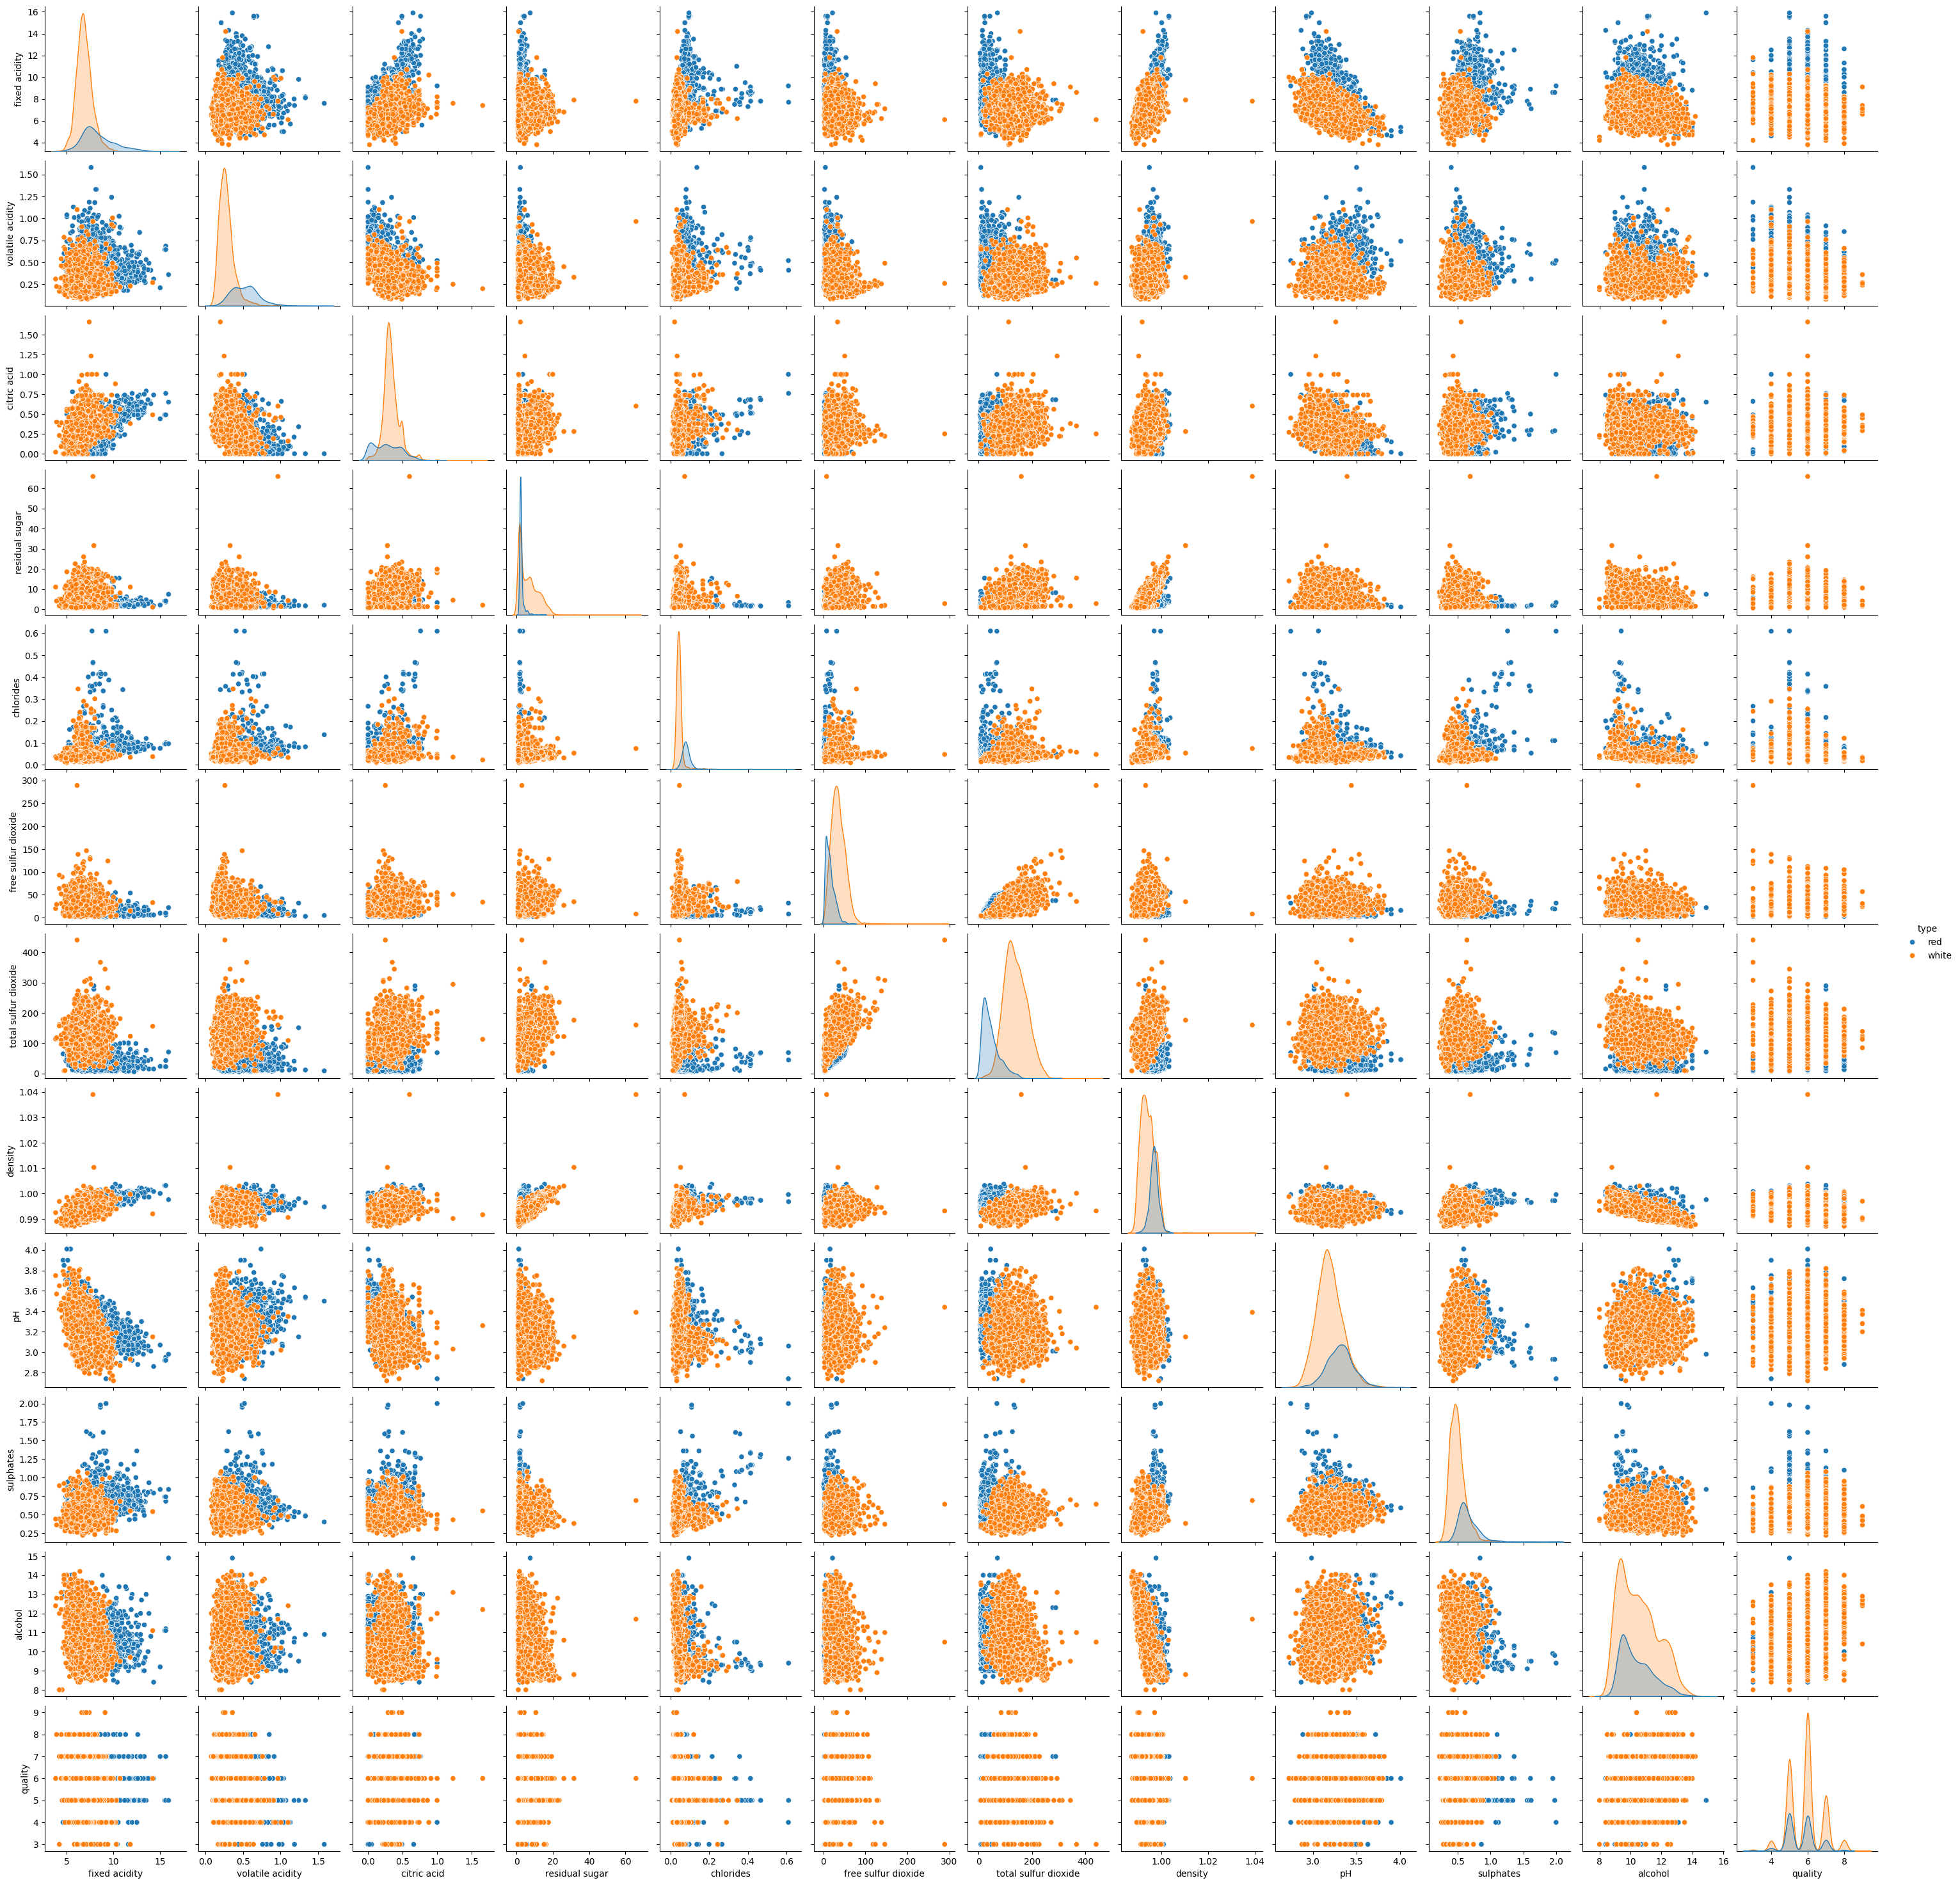

In [ ]:
# Visualization
sns.pairplot(wine, hue='type')
plt.show()

Text(0.5, 1.0, 'Quality Distribution by Wine Type')

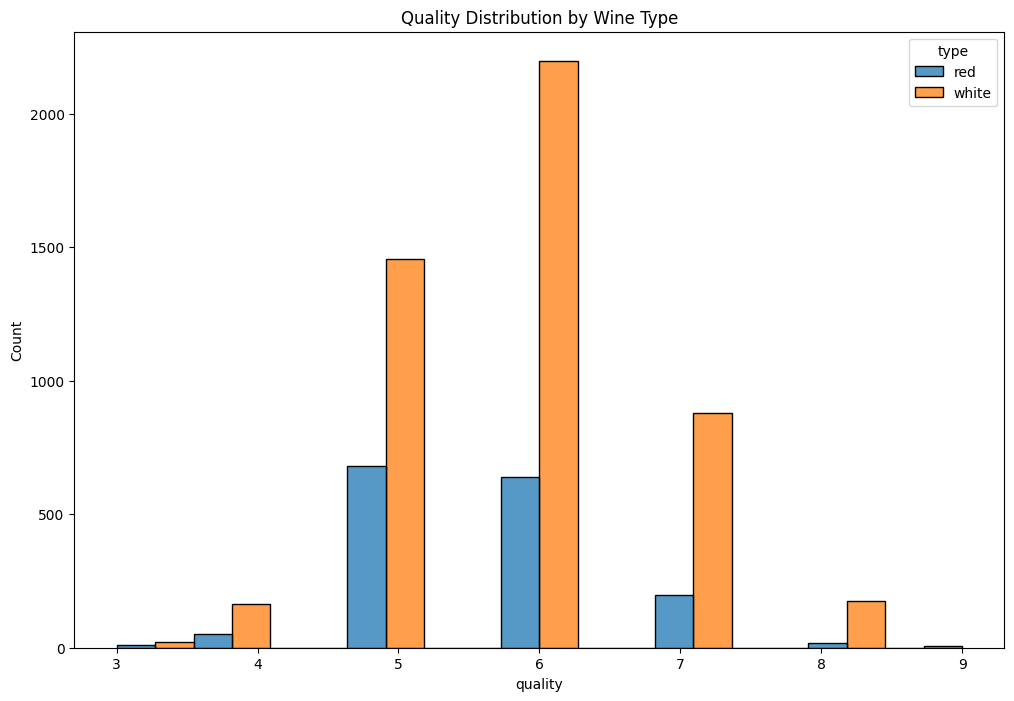

In [ ]:
# Quality distribution
plt.figure(figsize=(12,8))
sns.histplot(data=wine, x='quality', hue='type', multiple='dodge', bins=11)
plt.title('Quality Distribution by Wine Type')

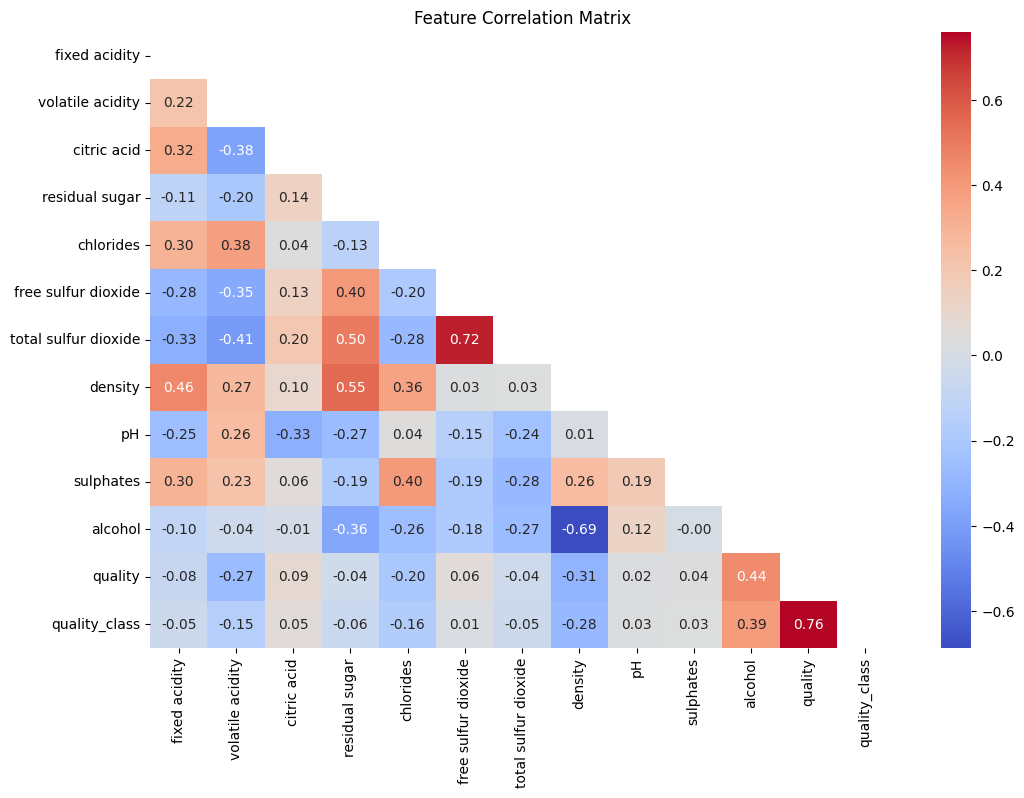

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = wine.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Feature Correlation Matrix')
plt.show()

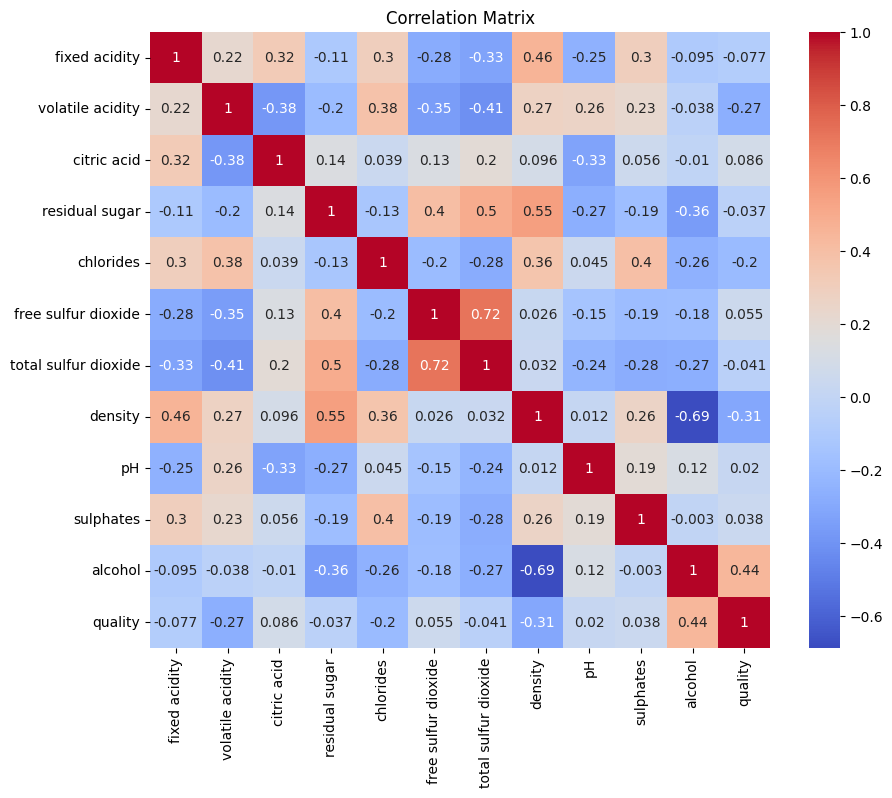

In [ ]:
plt.figure(figsize=(10,8))
corr = wine.drop('type', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

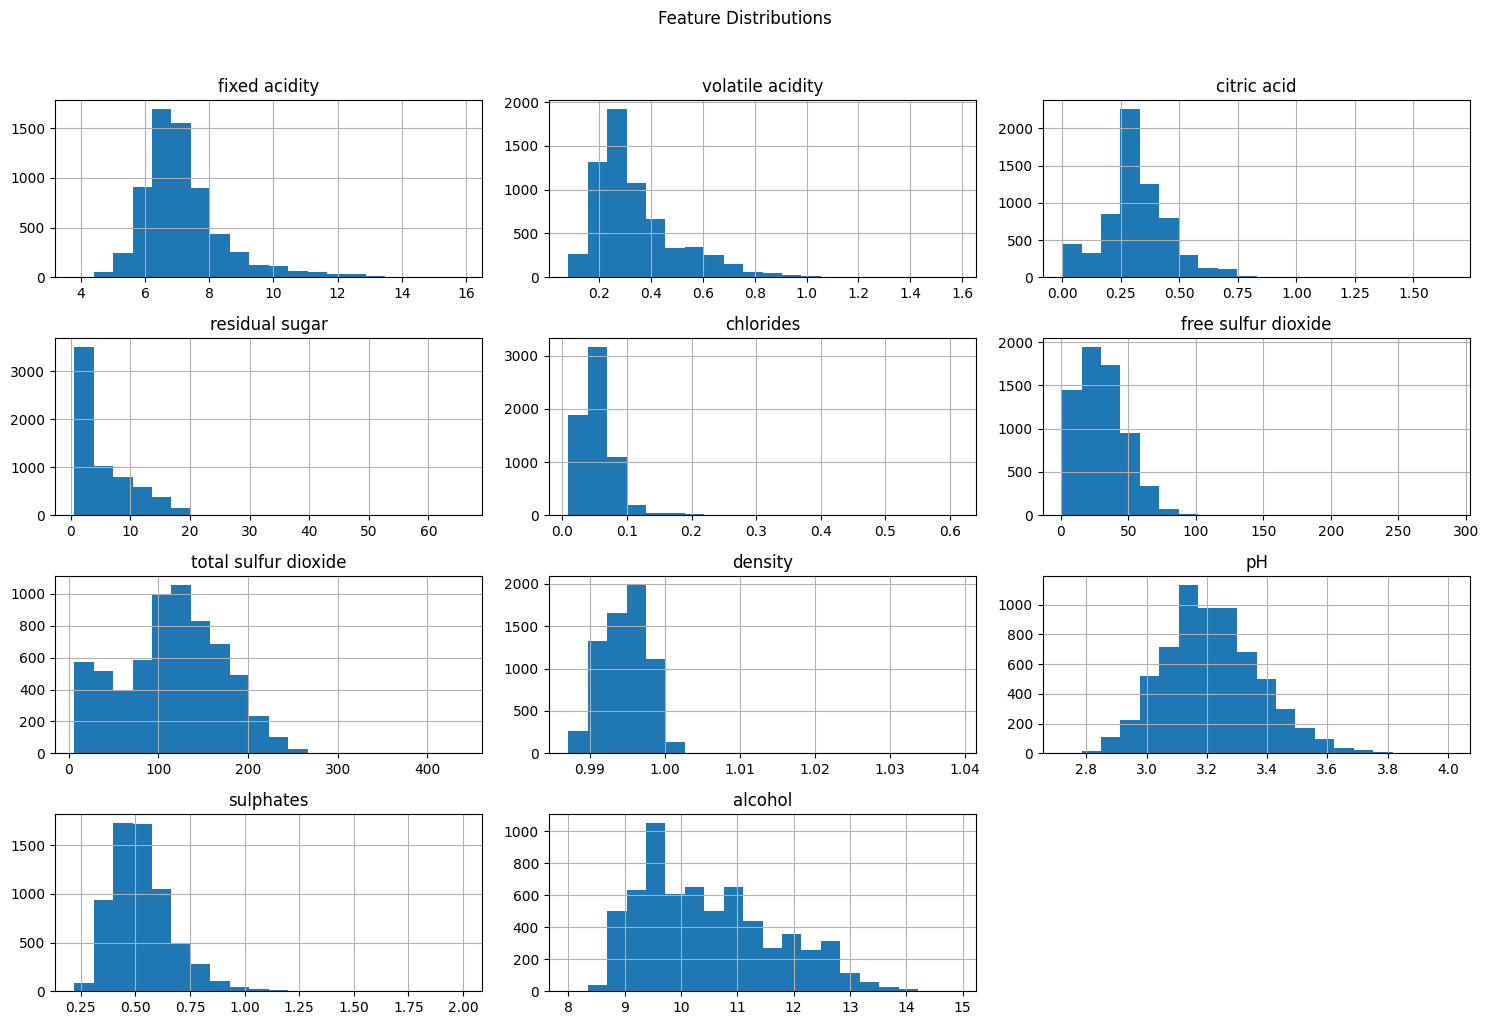

In [ ]:
# Feature distributions
wine.drop(['quality', 'quality_class'], axis=1).hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Classification Task (Binary Classification )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating binary taget (quality >= 7 = 'good')
wine['quality_class'] = wine['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [ ]:
# Features and Target
X = wine.drop(['quality', 'quality_class'], axis=1)
y = wine['quality_class']
X = pd.get_dummies(X, columns=['type'], drop_first=True)

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


📝 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1048
           1       0.80      0.57      0.67       252

    accuracy                           0.89      1300
   macro avg       0.85      0.77      0.80      1300
weighted avg       0.88      0.89      0.88      1300



<Figure size 800x600 with 0 Axes>

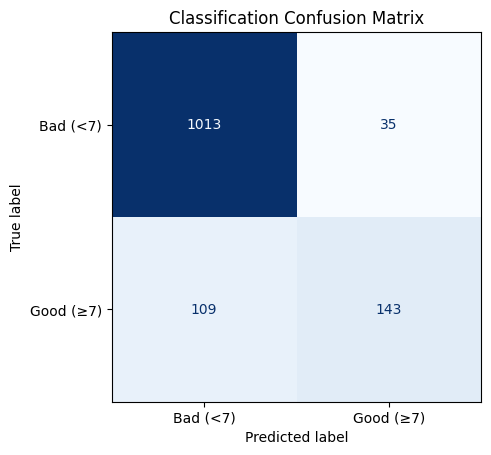

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# Evaluation
print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=['Bad (<7)', 'Good (≥7)'],
    cmap='Blues',
    colorbar=False
)
plt.title('Classification Confusion Matrix')
plt.show()

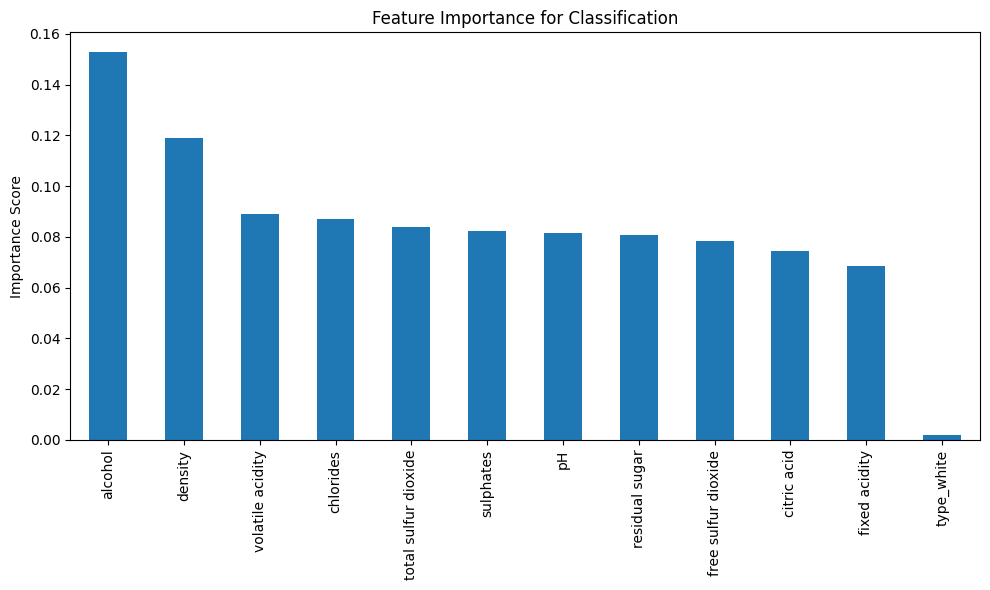

In [ ]:
# Feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importance for Classification')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

In [ ]:
# 3. Regression Task(Predictive Modeling)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_reg = wine.drop('quality', axis=1)
y_reg = wine['quality']
X_reg = pd.get_dummies(X_reg, columns=['type'], drop_first=True)


In [ ]:
# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [ ]:
# Train regressor
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)

In [ ]:
# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test_reg, y_pred_reg)**0.5
r2 = r2_score(y_test_reg, y_pred_reg)

print("\n📊 Regression Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


📊 Regression Performance:
RMSE: 0.4634
R² Score: 0.7093


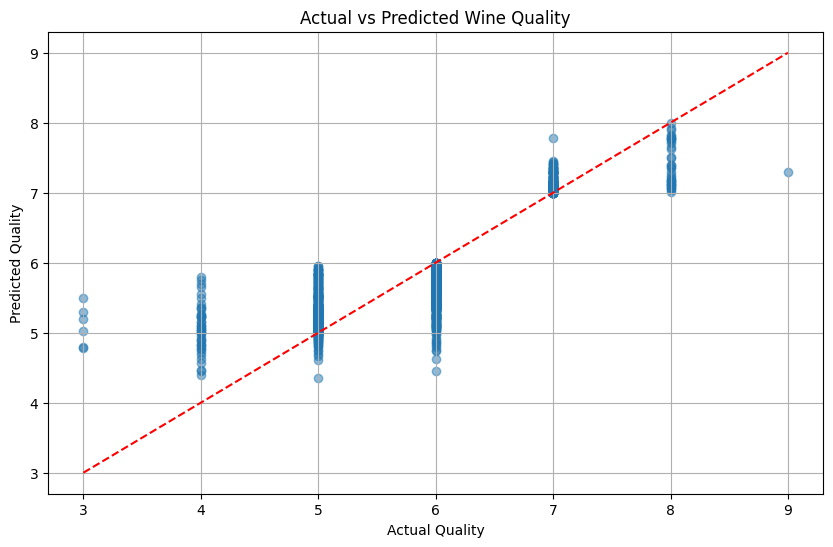

In [ ]:
# Visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([3, 9], [3, 9], 'r--')
plt.title('Actual vs Predicted Wine Quality')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.grid(True)
plt.show()

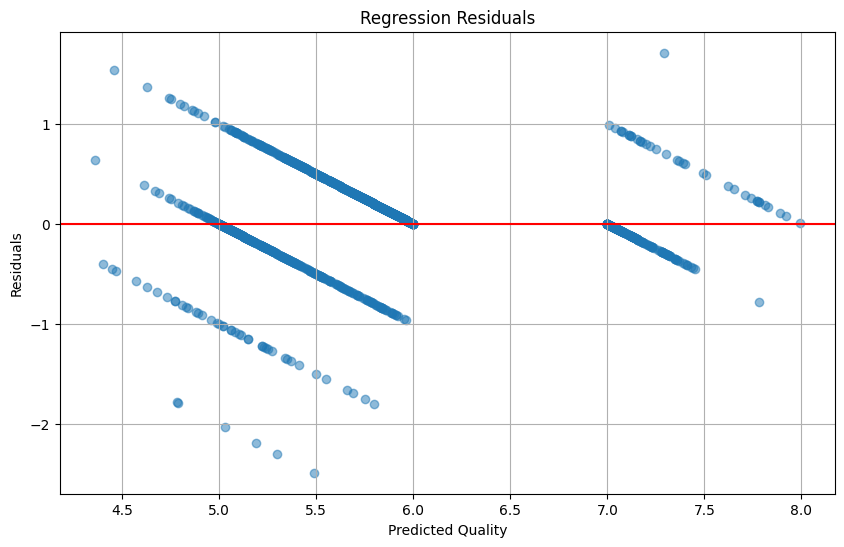

In [ ]:
# Residual plot
residuals = y_test_reg - y_pred_reg
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_reg, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Regression Residuals')
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [ ]:
# 4. Model Evalution

In [ ]:
from sklearn.metrics import classification_report, mean_squared_error, r2_score

In [ ]:
# Classification report
y_pred = clf.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1048
           1       0.82      0.58      0.68       252

    accuracy                           0.89      1300
   macro avg       0.86      0.77      0.81      1300
weighted avg       0.89      0.89      0.89      1300



In [ ]:
# REgression metrics
y_pred_reg = reg.predict(X_test_reg)
print("\nRegression Metrics:")
print("RMSE:", mean_squared_error(y_test_reg, y_pred_reg)**0.5)
print("R2 Score:", r2_score(y_test_reg, y_pred_reg))


Regression Metrics:
RMSE: 0.46572301110952535
R2 Score: 0.7063179488905127


In [ ]:
# 5. Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Tune classifier
param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5]
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Classifier Params:", grid_search.best_params_)

Best Classifier Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Evaluate tuned model
best_clf = grid_search.best_estimator_
y_pred_tuned = best_clf.predict(X_test)

print("\n📝 Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))


📝 Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1048
           1       0.80      0.58      0.67       252

    accuracy                           0.89      1300
   macro avg       0.85      0.77      0.80      1300
weighted avg       0.88      0.89      0.88      1300



In [ ]:
# 6. model Deployment

In [ ]:
import joblib

In [ ]:
joblib.dump(grid_search.best_estimator_, 'wine_quality_classifier.pkl')

['wine_quality_classifier.pkl']

In [ ]:
# sample prediction function
def predict_quality(fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol, wine_type):

# Load model
  model = joblib.load('wine_quality_classifier.pkl')

# Create input array
  input_data = [[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol, wine_type]]

# Convert to dataframe
  columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']

  df = pd.DataFrame(input_data, columns=columns)
  df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Ensurecolumns consistency
  missing_cols = set(X_train.columns) - set(df.columns)
  for c in missing_cols:
    df[c] = 0
  df = df[X_train.columns]

# Return prediction
  pred = model.predict(df)[0]
  return "Good wine (≥7)" if pred == 1 else "Bad wine (<7)"

In [ ]:
# Test prediction function
print("\n🧪 Testing Prediction Function...")
sample_prediction = predict_quality(
    fixed_acidity=7.4, volatile_acidity=0.7, citric_acid=0.0,
    residual_sugar=1.9, chlorides=0.076, free_sulfur_dioxide=11,
    total_sulfur_dioxide=34, density=0.9978, pH=3.51,
    sulphates=0.56, alcohol=9.4, wine_type='red'
)
print(f"Sample Prediction: {sample_prediction}")


🧪 Testing Prediction Function...
Sample Prediction: Bad wine (<7)
